### Ch4_Q14
In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
!pip install ISLP

In [41]:
from ISLP import load_data
Auto = load_data('Auto')
print(Auto)

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0         130    3504          12.0    70   
1    15.0          8         350.0         165    3693          11.5    70   
2    18.0          8         318.0         150    3436          11.0    70   
3    16.0          8         304.0         150    3433          12.0    70   
4    17.0          8         302.0         140    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
387  27.0          4         140.0          86    2790          15.6    82   
388  44.0          4          97.0          52    2130          24.6    82   
389  32.0          4         135.0          84    2295          11.6    82   
390  28.0          4         120.0          79    2625          18.6    82   
391  31.0          4         119.0          82    2720          19.4    82   

     origin                       name  
0         1  chevrolet

#### (a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() method of the data frame. Note you may find it helpful to add a column mpg01 to the data frame by assignment. Assuming you have stored the data frame as Auto, this can be done as follows:<br> Auto['mpg01'] = mpg01

In [42]:
median_mpg = Auto['mpg'].median()
Auto['mpg01'] = (Auto['mpg'] > median_mpg).astype(int)

#### (b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

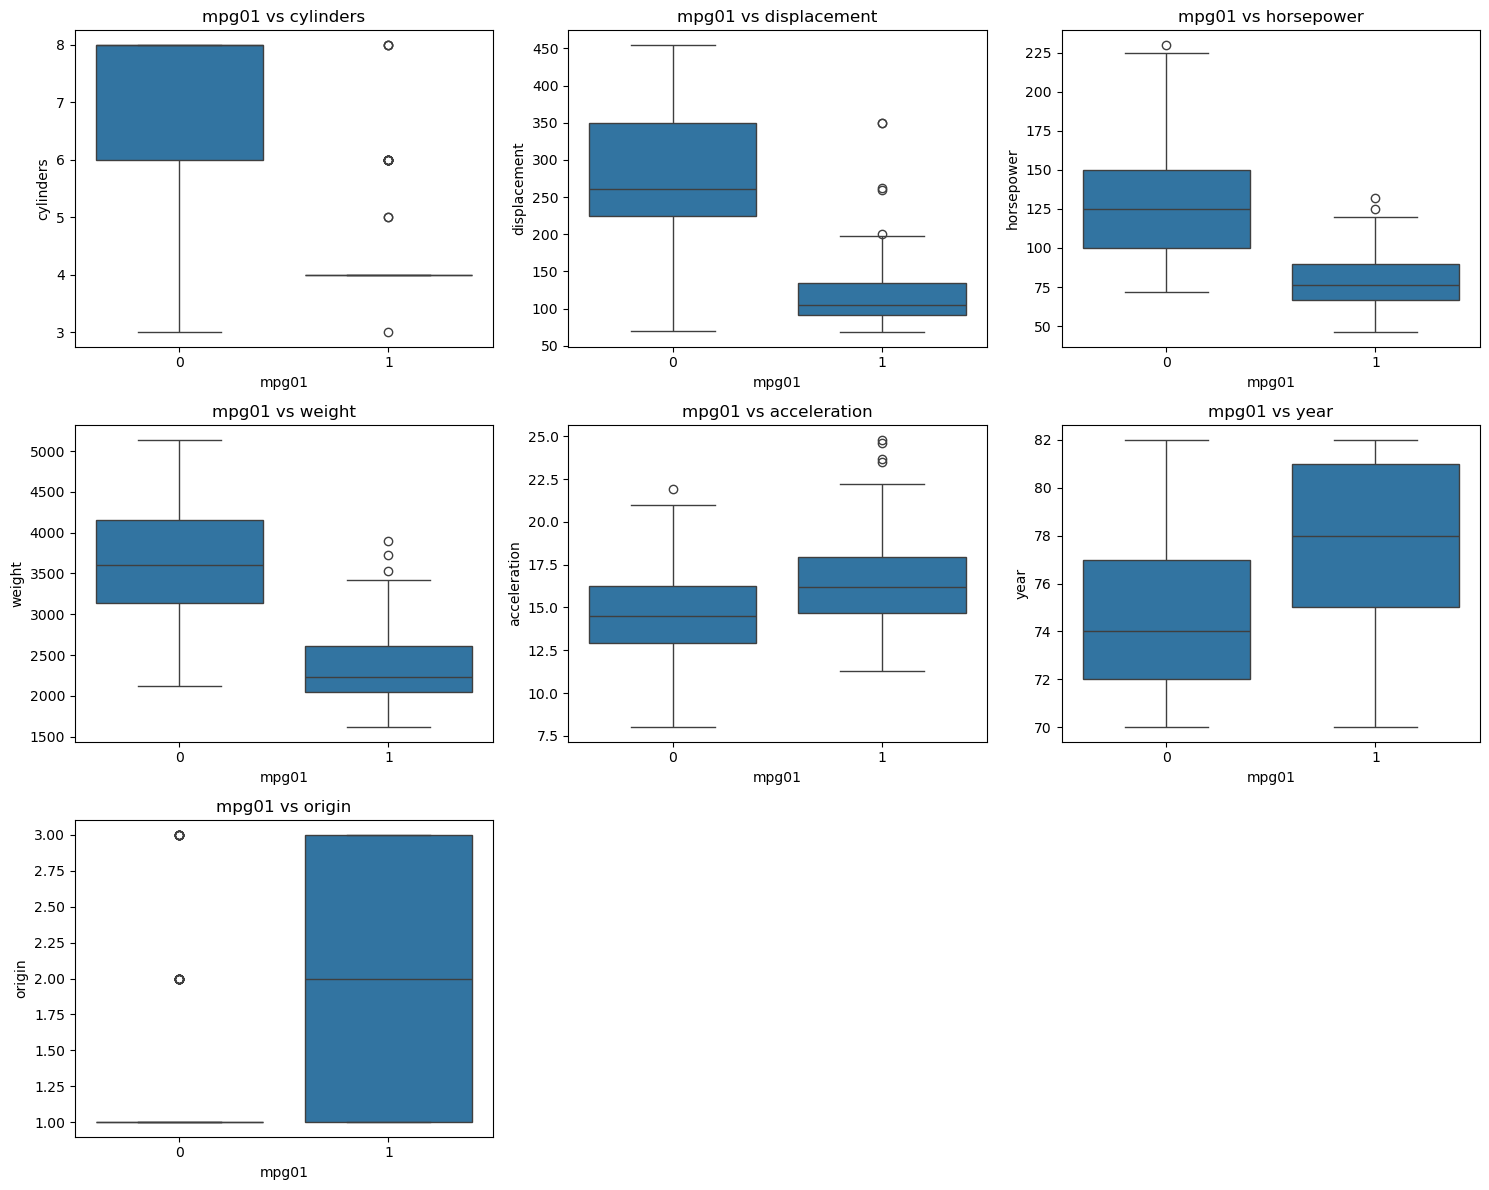

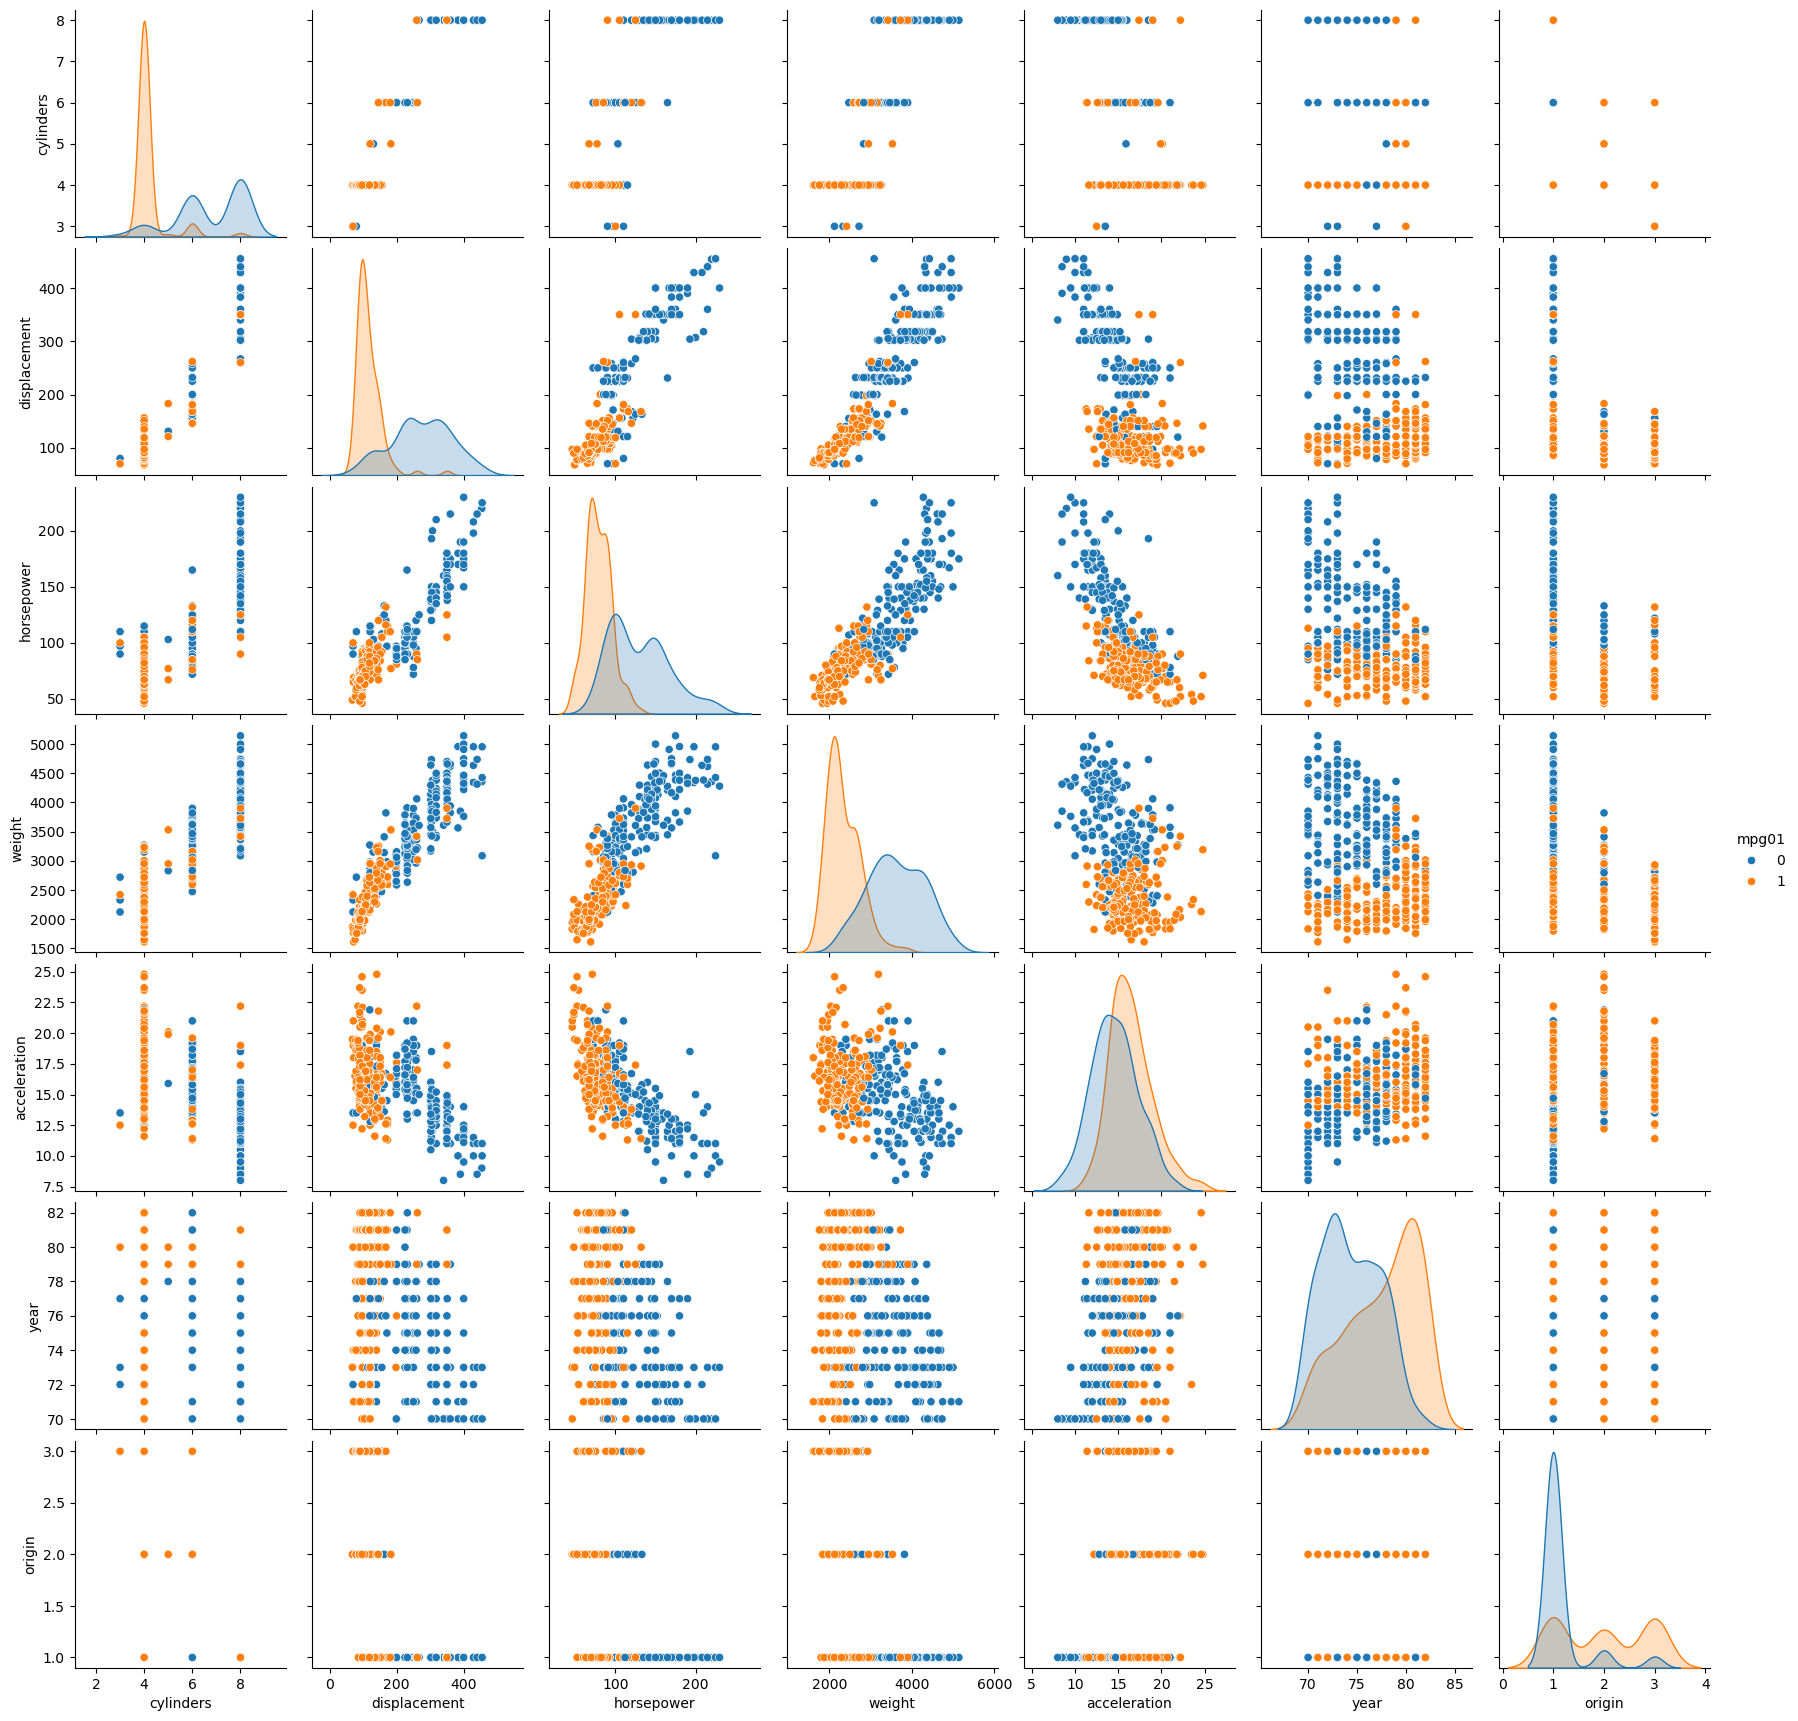

In [34]:
# 繪製每個特徵與 mpg01 的箱型圖
plt.figure(figsize=(15, 12))
for i, column in enumerate(Auto.columns.drop(['name','mpg', 'mpg01']), 1):  # 排除 'mpg' 和 'mpg01' 本身
    plt.subplot(3, 3, i)  # 根據特徵數量調整網格大小
    sns.boxplot(x='mpg01', y=column, data=Auto)
    plt.title(f'mpg01 vs {column}')
plt.tight_layout()
plt.show()

# 繪製每個特徵與 mpg01 的散點圖矩陣
sns.pairplot(Auto, hue='mpg01', vars=Auto.columns.drop(['name','mpg', 'mpg01']))
plt.show()

1. 車輛重量（weight）：
車輛重量對於 mpg01 的影響似乎非常顯著。箱型圖顯示出當 mpg01=0（低油耗）時，車輛的重量通常較高；而當 mpg01=1（高油耗）時，重量通常較低。
在散點圖中，我們可以看到 mpg01=1 的數據點主要集中在較低的重量範圍內，這表明重量可能是一個有效的預測變量。
2. 引擎排量（displacement）：
車輛的引擎排量與油耗之間也存在一定的關聯。當 mpg01=0（低油耗）時，車輛排量通常較大，而 mpg01=1（高油耗）時排量偏小。
這表明排量較大的車輛可能傾向於低油耗，而排量較小的車輛則可能具備較高的油耗表現。
3. 馬力（horsepower）：
mpg01 與馬力的關係類似於重量和排量。當 mpg01=0 時，車輛的馬力通常較高，這表明馬力較高的車輛在油耗方面往往表現不佳。
在散點圖中，高馬力的車輛更多集中在低油耗的範圍中，而低馬力車輛則分佈在高油耗區域。
4. 加速度（acceleration）：
mpg01 與加速度之間的關聯似乎較弱。箱型圖和散點圖顯示，儘管存在些微差異，但加速度並未顯示出與 mpg01 有強烈的關聯。
加速度的分佈在 mpg01=0 和 mpg01=1 之間有部分重疊，顯示它對於預測油耗的區分效果較差。
5. 年份（year）：
mpg01 與年份之間的圖表顯示出某些趨勢。隨著年份增加，車輛的油耗似乎更偏向高油耗（mpg01=1）。
這可能反映了車輛技術的進步，導致後期車型普遍具備更好的燃油效率。
6. 起源（origin）：
origin 與 mpg01 之間的關係也值得注意，尤其是來自不同地區（美國、歐洲、日本）的車輛在油耗方面有顯著區別。通常來說，歐洲和日本的車型可能傾向於高油耗（mpg01=1），而美國車型較可能為低油耗（mpg01=0）。
這表明 origin 可能是一個有用的預測變量。

Result:<br>
Based on these observations, we can preliminarily identify some variables that may be useful for predicting mpg01, such as weight, displacement, horsepower, and year. In comparison, acceleration may have less predictive value, but origin could provide useful information about regional characteristics.

#### (c) Split the data into a training set and a test set.

In [43]:
X = Auto[['displacement', 'horsepower', 'weight', 'acceleration']]
y = Auto['mpg01']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

#### (d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [44]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
test_error_lda = 1 - accuracy_score(y_test, y_pred)
print(f'LDA Test Error: {test_error_lda:.3f}')

LDA Test Error: 0.119


#### (e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [45]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
test_error_qda = 1 - accuracy_score(y_test, y_pred)
print(f'QDA Test Error: {test_error_qda:.3f}')

QDA Test Error: 0.119


#### (f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [46]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
test_error_log = 1 - accuracy_score(y_test, y_pred)
print(f'Logistic Regression Test Error: {test_error_log:.3f}')

Logistic Regression Test Error: 0.110


#### (g) Perform naive Bayes on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [47]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
test_error_nb = 1 - accuracy_score(y_test, y_pred)
print(f'Naive Bayes Test Error: {test_error_nb:.3f}')

Naive Bayes Test Error: 0.119


#### (h) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

KNN Test Error with K=1: 0.127
KNN Test Error with K=2: 0.178
KNN Test Error with K=3: 0.119
KNN Test Error with K=4: 0.127
KNN Test Error with K=5: 0.119
KNN Test Error with K=6: 0.127
KNN Test Error with K=7: 0.136
KNN Test Error with K=8: 0.144
KNN Test Error with K=9: 0.144
KNN Test Error with K=10: 0.144
KNN Test Error with K=11: 0.161
KNN Test Error with K=12: 0.153
KNN Test Error with K=13: 0.144
KNN Test Error with K=14: 0.153
KNN Test Error with K=15: 0.153
KNN Test Error with K=16: 0.144
KNN Test Error with K=17: 0.153
KNN Test Error with K=18: 0.153
KNN Test Error with K=19: 0.153
KNN Test Error with K=20: 0.153
Best K: 3 with Test Error: 0.119


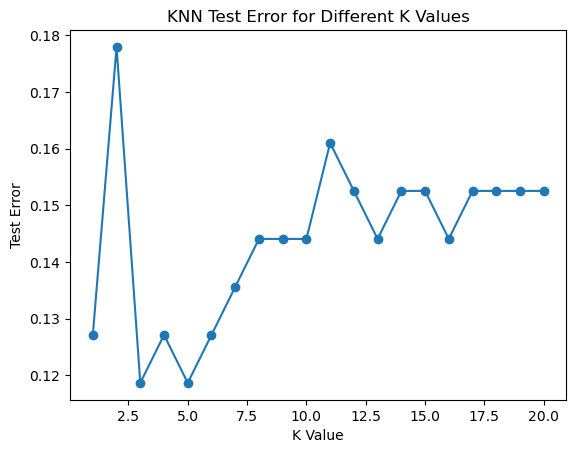

In [48]:
errors_knn = []
k_values = range(1, 21)  # 這裡嘗試 K 值從 1 到 20

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    test_error_knn = 1 - accuracy_score(y_test, y_pred)
    errors_knn.append(test_error_knn)
    print(f'KNN Test Error with K={k}: {test_error_knn:.3f}')

# 找到最小的測試誤差
best_k = k_values[errors_knn.index(min(errors_knn))]
print(f'Best K: {best_k} with Test Error: {min(errors_knn):.3f}')

plt.plot(k_values, errors_knn, marker='o')
plt.xlabel('K Value')
plt.ylabel('Test Error')
plt.title('KNN Test Error for Different K Values')
plt.show()

Summary:<br>
The plot suggests that a moderate value of 𝐾 minimizes the test error, achieving a good balance between bias and variance. The insight here is that neither very low nor very high values of 𝐾 are ideal; the best results are found with a carefully chosen middle-ground 𝐾. This helps ensure the KNN model is robust, generalizing well to new data without fitting too closely to the training data.